# Week 2 C
### Name: Jay Zhang

To solve the question: "What's the relationship between the APC gene and Colon Cancer when considering the influence of age?"

### 1. Data Preprocessing

In [1]:
!pip3 install sparse_lmm
!pip3 install pandas
!pip3 install numpy
!pip3 install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip


In [1]:
# Read file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sparse_lmm import VariableSelection
clinical_data = pd.read_csv('/Users/kitkatj/Downloads/ai4science/TCGA dataset/TCGA_Colon_Cancer_(COAD)/TCGA.COAD.sampleMap_COAD_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('/Users/kitkatj/Downloads/ai4science/TCGA dataset/TCGA_Colon_Cancer_(COAD)/TCGA.COAD.sampleMap_HiSeqV2_PANCAN', sep='\t', index_col=0)

In [2]:
# Display clinical dataset
clinical_data.head()

,AWG_MLH1_silencing,AWG_cancer_type_Oct62011,CDE_ID_3226963,CIMP,MSI_updated_Oct62011,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,...,_GENOMIC_ID_TCGA_COAD_RPPA_RBN,_GENOMIC_ID_TCGA_COAD_gistic2,_GENOMIC_ID_TCGA_COAD_exp_HiSeqV2_PANCAN,_GENOMIC_ID_TCGA_COAD_exp_GAV2,_GENOMIC_ID_TCGA_COAD_exp_GAV2_exon,_GENOMIC_ID_TCGA_COAD_gistic2thd,_GENOMIC_ID_TCGA_COAD_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_COAD_G4502A_07_3,_GENOMIC_ID_TCGA_COAD_miRNA_HiSeq,_GENOMIC_ID_TCGA_COAD_hMethyl27
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3L-AA1B-01,NaN,NaN,MSS,NaN,NaN,TCGA-3L-AA1B-01,NaN,NaN,NaN,NaN,...,NaN,TCGA-3L-AA1B-01A-11D-A36W-01,58746677-c72b-4f75-bf2b-d4428d58aec5,NaN,NaN,TCGA-3L-AA1B-01A-11D-A36W-01,58746677-c72b-4f75-bf2b-d4428d58aec5,NaN,TCGA-3L-AA1B-01,NaN
TCGA-4N-A93T-01,NaN,NaN,MSS,NaN,NaN,TCGA-4N-A93T-01,NaN,NaN,NaN,NaN,...,NaN,TCGA-4N-A93T-01A-11D-A36W-01,a07d6a16-b755-4bfb-a982-eb5906cdc0f6,NaN,NaN,TCGA-4N-A93T-01A-11D-A36W-01,a07d6a16-b755-4bfb-a982-eb5906cdc0f6,NaN,TCGA-4N-A93T-01,NaN
TCGA-4T-AA8H-01,NaN,NaN,Indeterminate,NaN,NaN,TCGA-4T-AA8H-01,NaN,NaN,NaN,NaN,...,NaN,TCGA-4T-AA8H-01A-11D-A40O-01,16689efe-1dcc-46f8-9c81-c8d7d81306a6,NaN,NaN,TCGA-4T-AA8H-01A-11D-A40O-01,16689efe-1dcc-46f8-9c81-c8d7d81306a6,NaN,TCGA-4T-AA8H-01,NaN
TCGA-5M-AAT4-01,NaN,NaN,MSS,NaN,NaN,TCGA-5M-AAT4-01,NaN,NaN,NaN,NaN,...,NaN,TCGA-5M-AAT4-01A-11D-A40O-01,7d32ee7b-77a7-4c50-923f-a870221640e5,NaN,NaN,TCGA-5M-AAT4-01A-11D-A40O-01,7d32ee7b-77a7-4c50-923f-a870221640e5,NaN,TCGA-5M-AAT4-01,NaN
TCGA-5M-AAT5-01,NaN,NaN,MSI-L,NaN,NaN,TCGA-5M-AAT5-01,NaN,NaN,NaN,NaN,...,NaN,TCGA-5M-AAT5-01A-21D-A40O-01,66ea9a6e-0bfa-4eab-a96d-a8982d433d9c,NaN,NaN,TCGA-5M-AAT5-01A-21D-A40O-01,66ea9a6e-0bfa-4eab-a96d-a8982d433d9c,NaN,TCGA-5M-AAT5-01,NaN


In [3]:
# Display gene dataset
gene_data.head()

,TCGA-CA-5256-01,TCGA-AZ-6599-01,TCGA-AA-3655-01,TCGA-A6-6137-01,TCGA-CK-4952-01,TCGA-A6-5657-01,TCGA-AD-6963-01,TCGA-AA-3663-11,TCGA-A6-6138-01,TCGA-A6-A567-01,...,TCGA-F4-6570-01,TCGA-G4-6317-01,TCGA-SS-A7HO-01,TCGA-4T-AA8H-01,TCGA-CM-6162-01,TCGA-AA-3489-11,TCGA-DM-A1D4-01,TCGA-QG-A5YV-01,TCGA-CA-5796-01,TCGA-G4-6626-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,0.297608,1.257208,1.160508,1.193608,0.702008,0.554908,0.999508,1.190308,0.507608,1.647308,...,0.700808,0.846408,2.067408,1.385708,0.829308,0.563208,0.680008,1.386608,0.763408,1.240208
HIF3A,-1.837526,-3.211026,-3.468926,0.521174,-3.604126,-0.077026,-1.091326,2.894474,-3.660426,-0.807326,...,-2.716926,-0.145126,3.349874,-2.265826,-1.738426,1.567574,-3.099426,-1.594726,-4.366926,-1.523426
RNF17,-0.531035,-0.531035,0.018465,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,...,-0.531035,-0.531035,-0.531035,-0.531035,0.396865,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035
RNF10,-1.291872,-0.089772,-0.271372,-0.072272,0.090828,-0.291472,-0.337872,0.146228,-0.019572,-0.347272,...,-0.313572,-0.598372,-0.786172,0.130428,-0.259072,-0.147072,-0.052972,-0.186672,-0.243672,-0.495872
RNF11,-0.452178,-0.584878,-1.034478,-0.723578,-1.114178,-0.790178,-1.657478,0.110122,-0.556378,-0.272578,...,-0.715278,-1.532378,-1.199378,-1.120078,0.061922,0.577922,-1.988078,-1.304978,-0.185378,-2.215478


In [4]:
# Set Basic info
gene_fullname = 'APC gene'
gene = 'apc'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Colon Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 132 features, and the gene dataset includes 20530 genes


In [5]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,AWG_MLH1_silencing,AWG_cancer_type_Oct62011,CDE_ID_3226963,CIMP,MSI_updated_Oct62011,_INTEGRATION,_PANCAN_CNA_PANCAN_K8,_PANCAN_Cluster_Cluster_PANCAN,_PANCAN_DNAMethyl_PANCAN,_PANCAN_RPPA_PANCAN_K8,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3L-AA1B-01,NaN,NaN,MSS,NaN,NaN,TCGA-3L-AA1B-01,NaN,NaN,NaN,NaN,...,-0.748878,-0.034117,0.002867,1.00211,-0.349177,-0.617186,-0.564127,1.189605,1.265867,0.333188
TCGA-4N-A93T-01,NaN,NaN,MSS,NaN,NaN,TCGA-4N-A93T-01,NaN,NaN,NaN,NaN,...,-0.748878,3.199883,-1.707933,-1.28139,-0.260777,-2.458586,-1.853027,1.927305,-2.865233,-0.047712
TCGA-4T-AA8H-01,NaN,NaN,Indeterminate,NaN,NaN,TCGA-4T-AA8H-01,NaN,NaN,NaN,NaN,...,-0.748878,1.335083,-2.255633,-1.28139,-0.466377,-2.600886,-2.654627,0.931005,-2.132533,0.201188
TCGA-5M-AAT4-01,NaN,NaN,MSS,NaN,NaN,TCGA-5M-AAT4-01,NaN,NaN,NaN,NaN,...,-0.232578,-1.070817,-1.418933,0.16281,-0.267377,-1.509886,-0.550327,0.646005,-1.272133,-0.140812
TCGA-5M-AAT5-01,NaN,NaN,MSI-L,NaN,NaN,TCGA-5M-AAT5-01,NaN,NaN,NaN,NaN,...,-0.748878,-1.587117,-1.680633,-0.28919,-0.509977,-1.755586,-1.232127,0.625105,-2.016233,0.405588


In [6]:
# Only select relevant columns
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3L-AA1B-01,-22379.0,1.513008,-0.002026,-0.531035,-0.071072,-0.865078,-0.81821,0.024706,0.799054,0.145701,...,-0.748878,-0.034117,0.002867,1.00211,-0.349177,-0.617186,-0.564127,1.189605,1.265867,0.333188
TCGA-4N-A93T-01,-24523.0,1.053208,-0.431026,-0.531035,-0.051372,-1.865578,0.03249,-0.819094,-2.489046,1.860601,...,-0.748878,3.199883,-1.707933,-1.28139,-0.260777,-2.458586,-1.853027,1.927305,-2.865233,-0.047712
TCGA-4T-AA8H-01,-15494.0,1.385708,-2.265826,-0.531035,0.130428,-1.120078,-0.64131,-0.618994,-2.043646,1.251701,...,-0.748878,1.335083,-2.255633,-1.28139,-0.466377,-2.600886,-2.654627,0.931005,-2.132533,0.201188
TCGA-5M-AAT4-01,-27095.0,0.708208,-3.403426,-0.014735,-0.346472,-1.825478,-0.53051,-0.769494,-1.134146,1.232601,...,-0.232578,-1.070817,-1.418933,0.16281,-0.267377,-1.509886,-0.550327,0.646005,-1.272133,-0.140812
TCGA-5M-AAT5-01,0.0,0.662908,-3.108026,-0.531035,-0.254772,-1.152978,-0.46081,-1.082994,-1.468646,0.156401,...,-0.748878,-1.587117,-1.680633,-0.28919,-0.509977,-1.755586,-1.232127,0.625105,-2.016233,0.405588


In [7]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])
    
    mapping = {
        (1, 9): 1,
        (10, 19): 0
    }
    
    return next((value for (start, end), value in mapping.items() if start <= last_two_digits <= end), -1)


# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Colon Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3L-AA1B-01,-22379.0,1.513008,-0.002026,-0.531035,-0.071072,-0.865078,-0.81821,0.024706,0.799054,0.145701,...,-0.034117,0.002867,1.00211,-0.349177,-0.617186,-0.564127,1.189605,1.265867,0.333188,1
TCGA-4N-A93T-01,-24523.0,1.053208,-0.431026,-0.531035,-0.051372,-1.865578,0.03249,-0.819094,-2.489046,1.860601,...,3.199883,-1.707933,-1.28139,-0.260777,-2.458586,-1.853027,1.927305,-2.865233,-0.047712,1
TCGA-4T-AA8H-01,-15494.0,1.385708,-2.265826,-0.531035,0.130428,-1.120078,-0.64131,-0.618994,-2.043646,1.251701,...,1.335083,-2.255633,-1.28139,-0.466377,-2.600886,-2.654627,0.931005,-2.132533,0.201188,1
TCGA-5M-AAT4-01,-27095.0,0.708208,-3.403426,-0.014735,-0.346472,-1.825478,-0.53051,-0.769494,-1.134146,1.232601,...,-1.070817,-1.418933,0.16281,-0.267377,-1.509886,-0.550327,0.646005,-1.272133,-0.140812,1
TCGA-5M-AAT5-01,0.0,0.662908,-3.108026,-0.531035,-0.254772,-1.152978,-0.46081,-1.082994,-1.468646,0.156401,...,-1.587117,-1.680633,-0.28919,-0.509977,-1.755586,-1.232127,0.625105,-2.016233,0.405588,1


In [8]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

### 2. Preliminary analysis

Plot the distributions of the target and important regressors

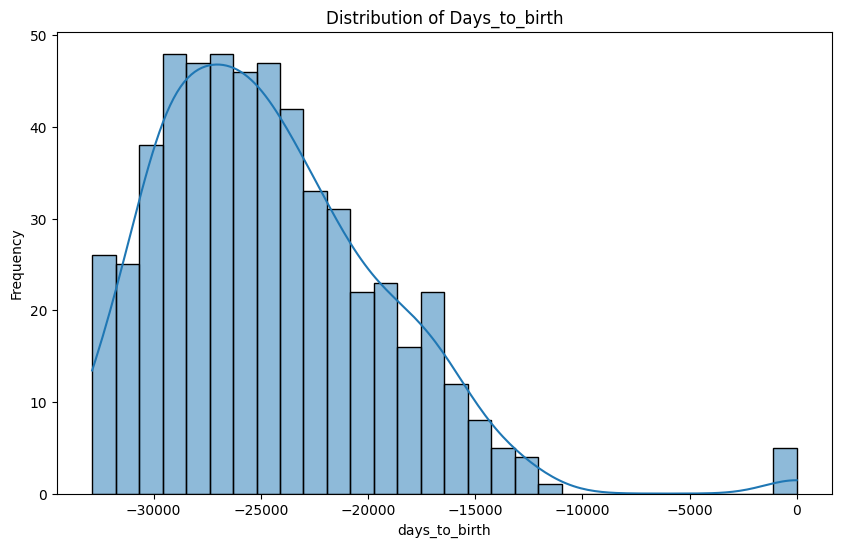

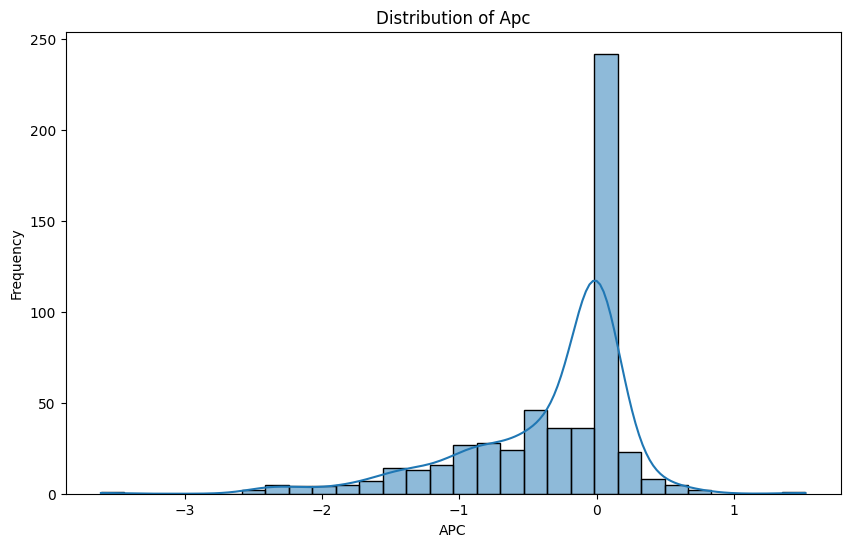

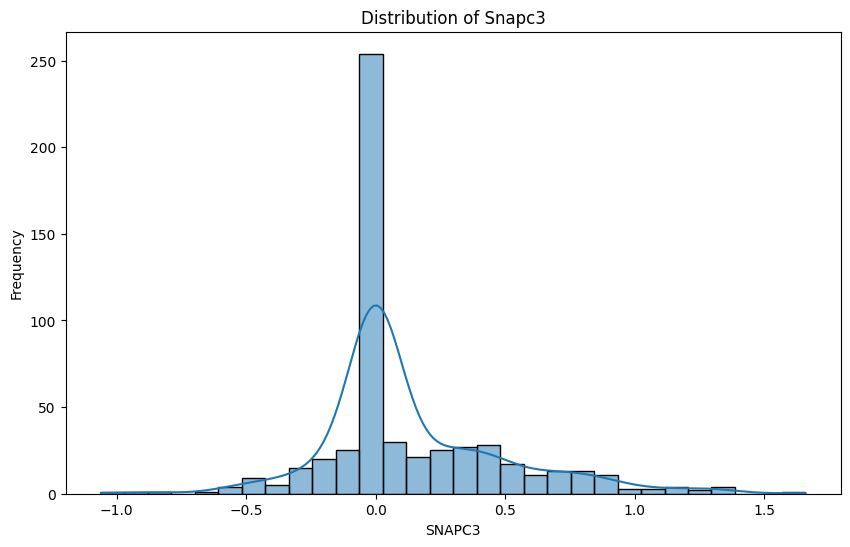

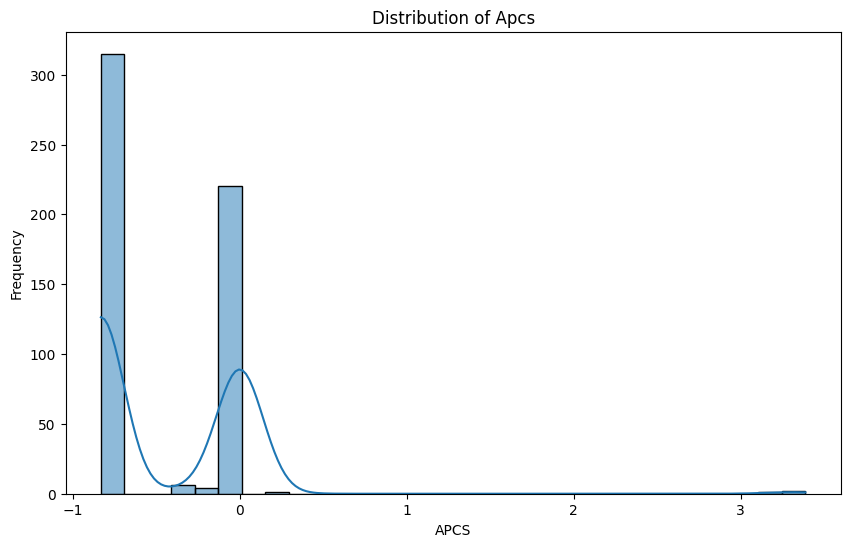

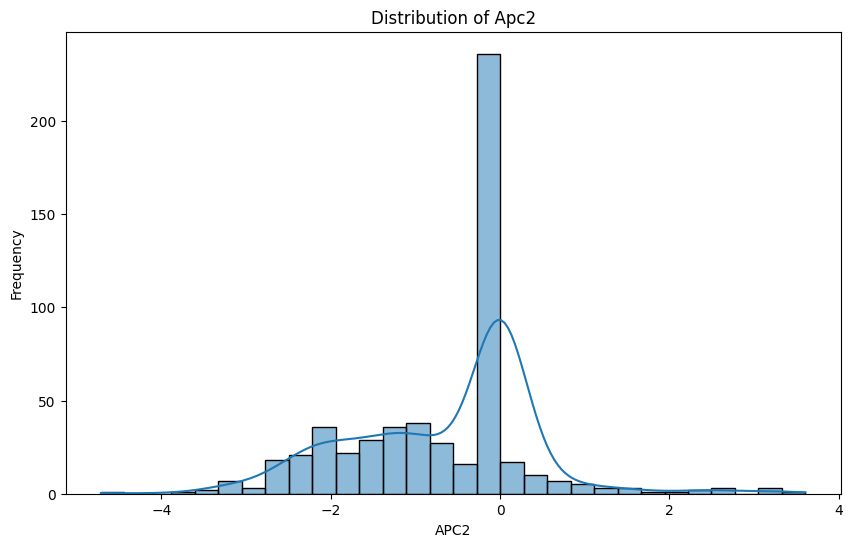

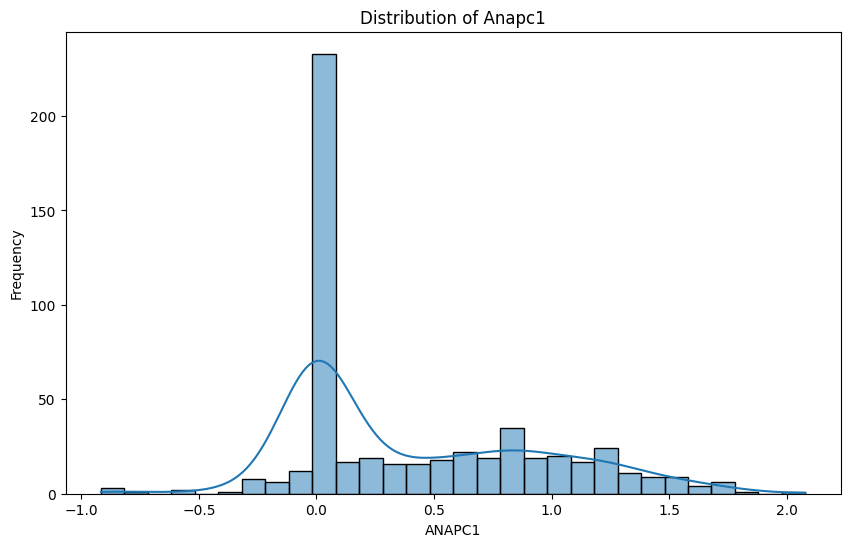

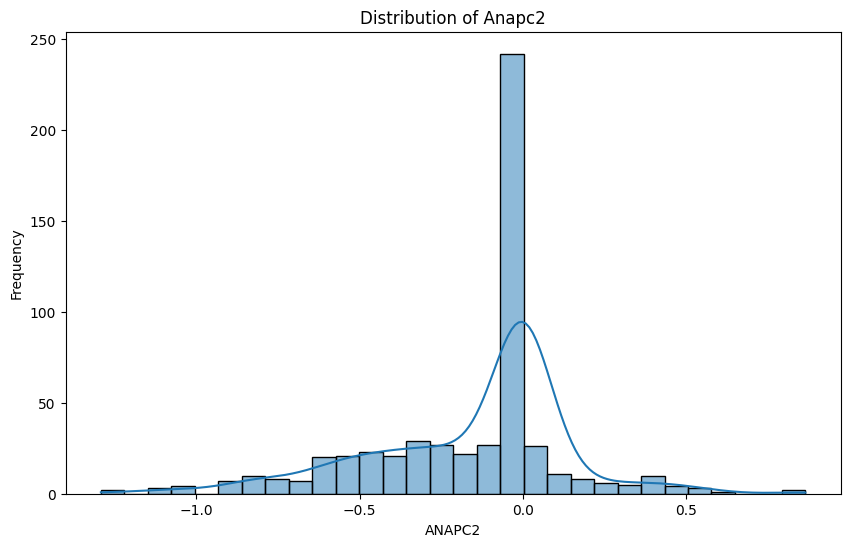

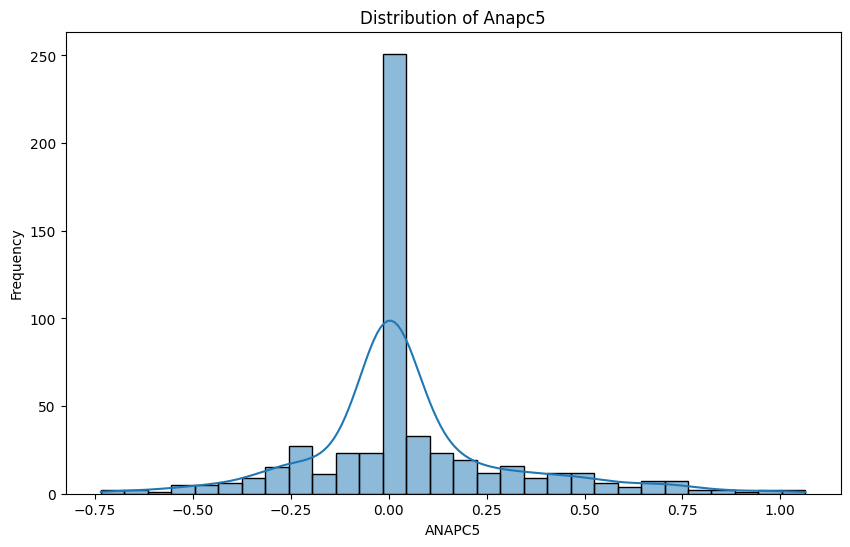

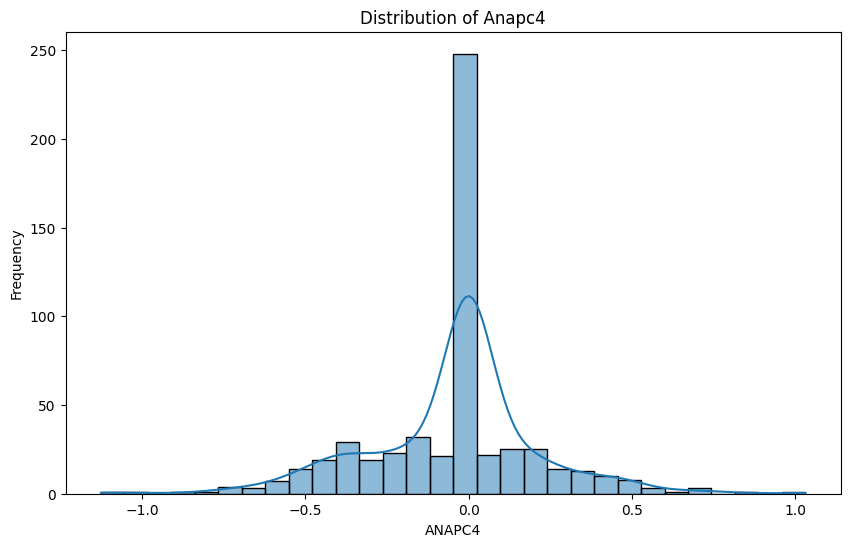

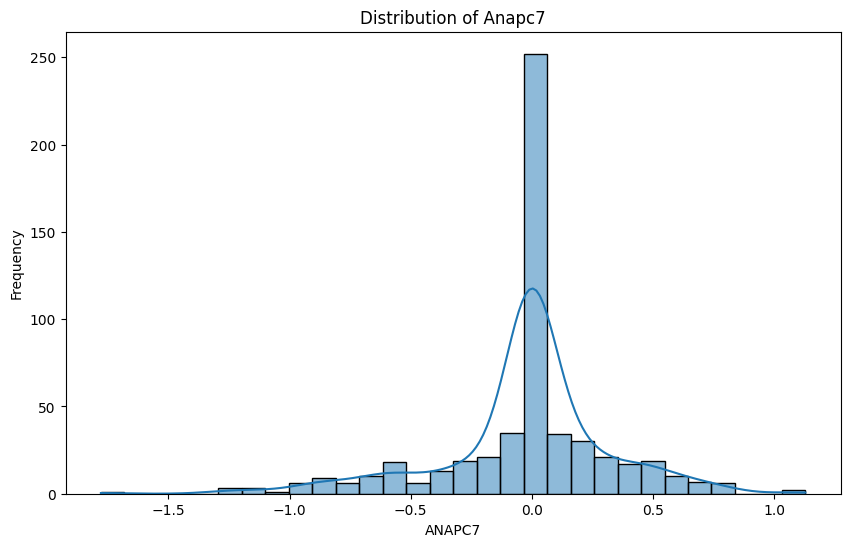

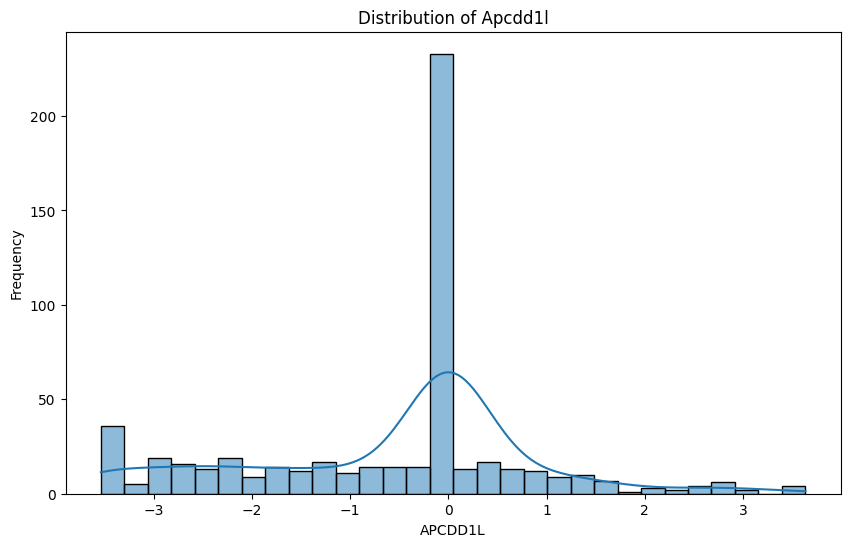

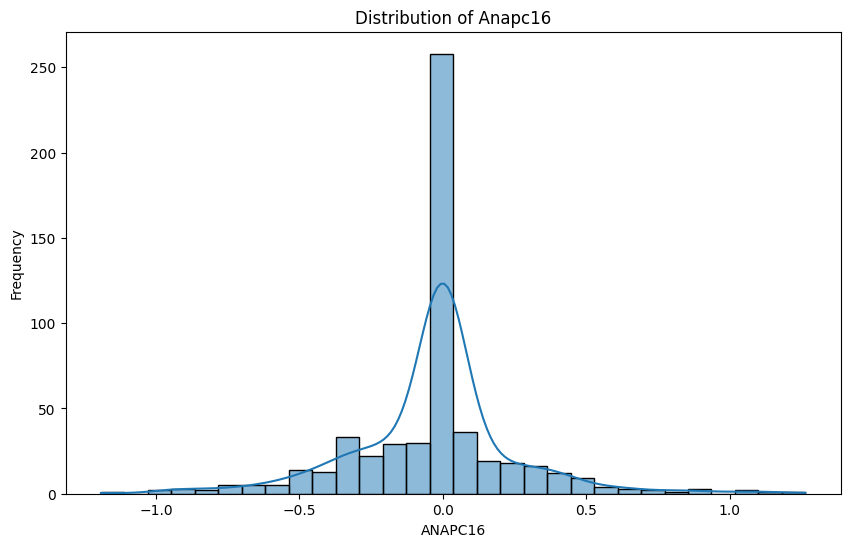

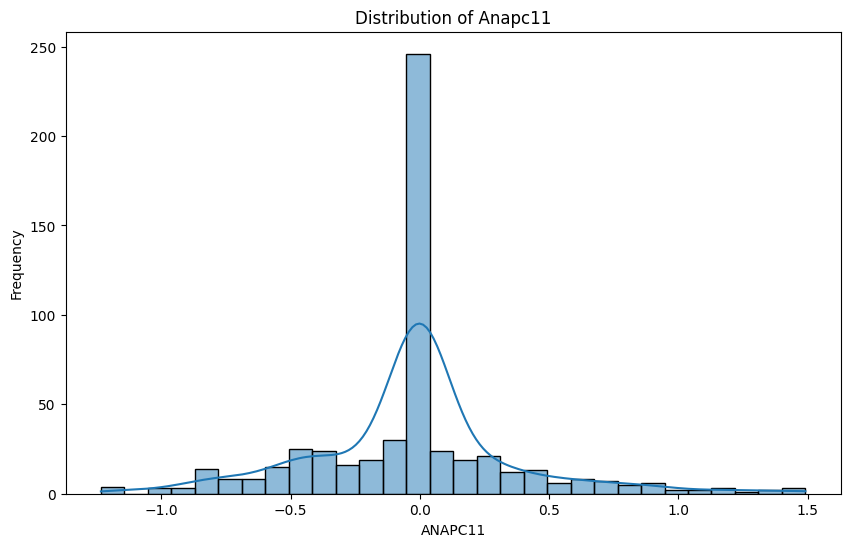

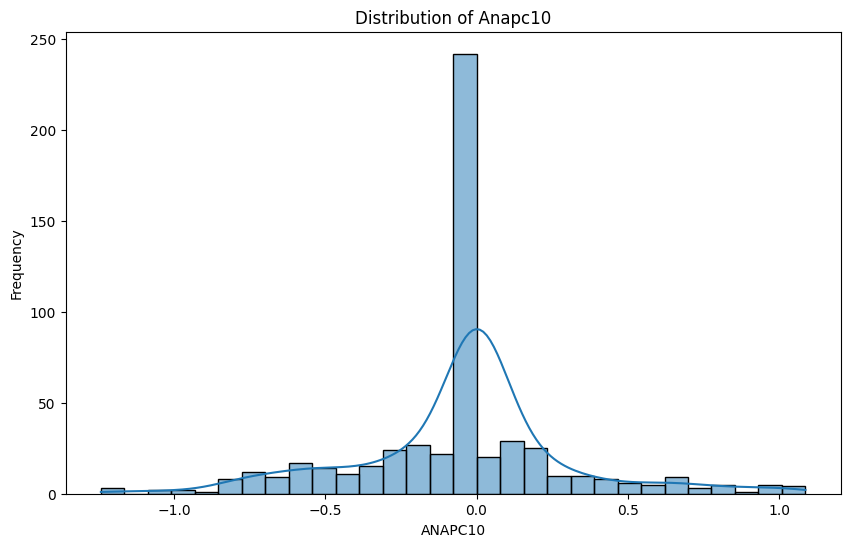

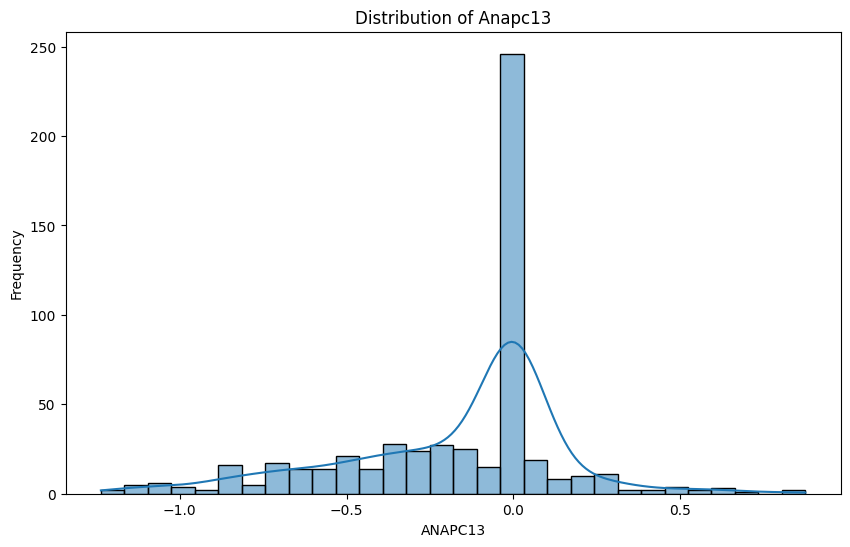

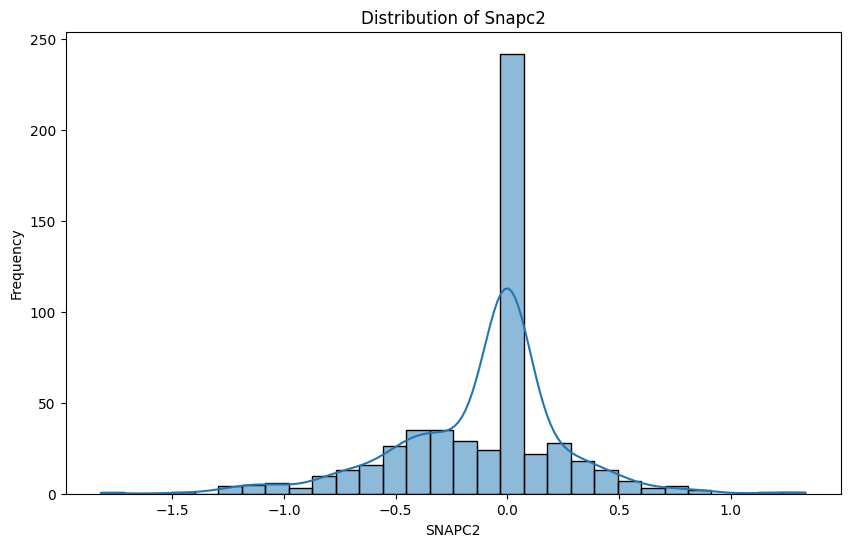

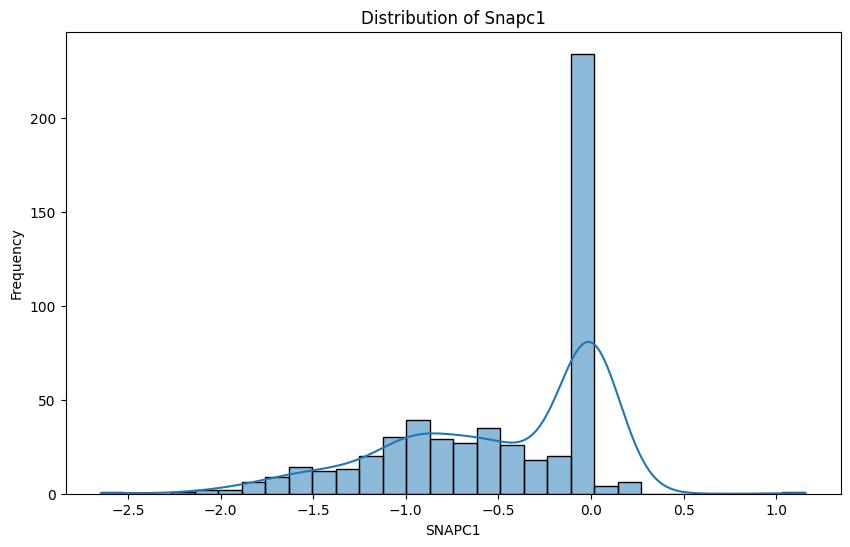

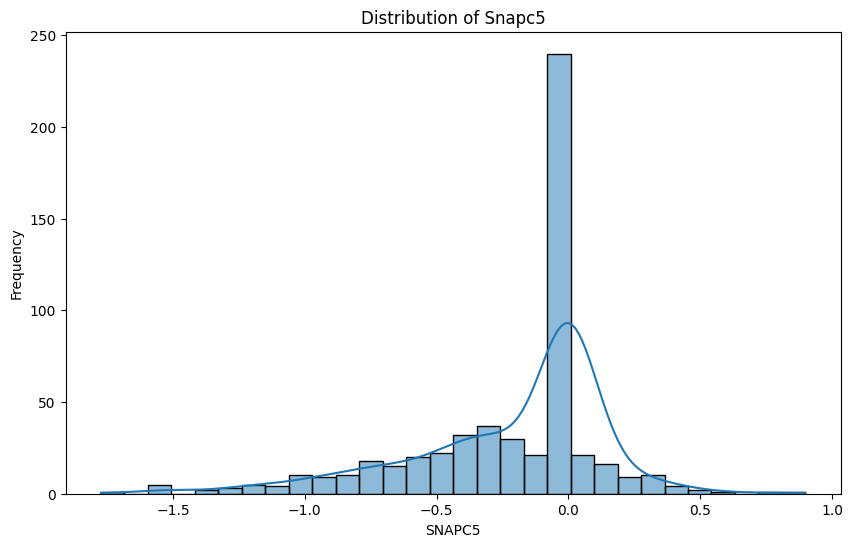

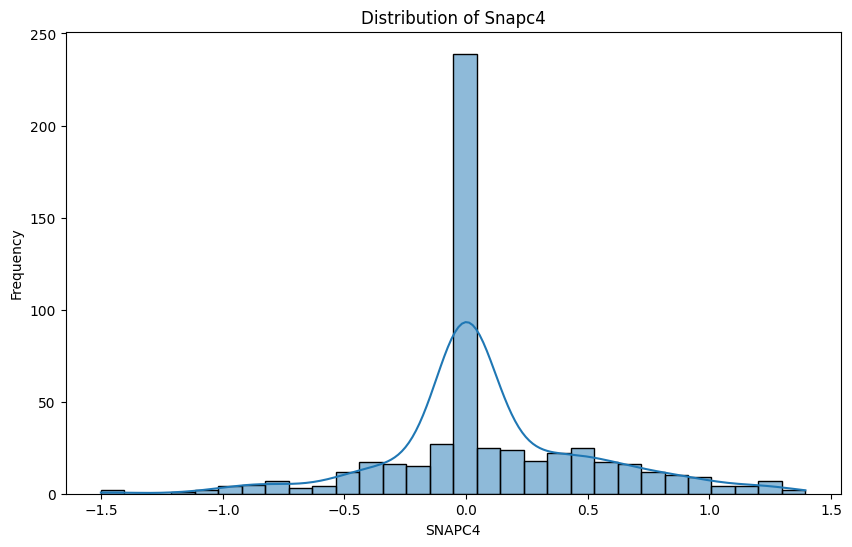

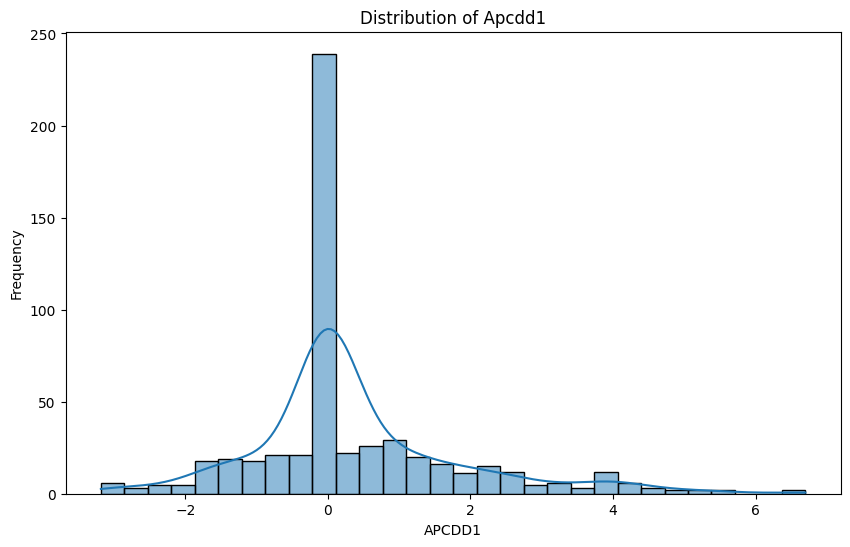

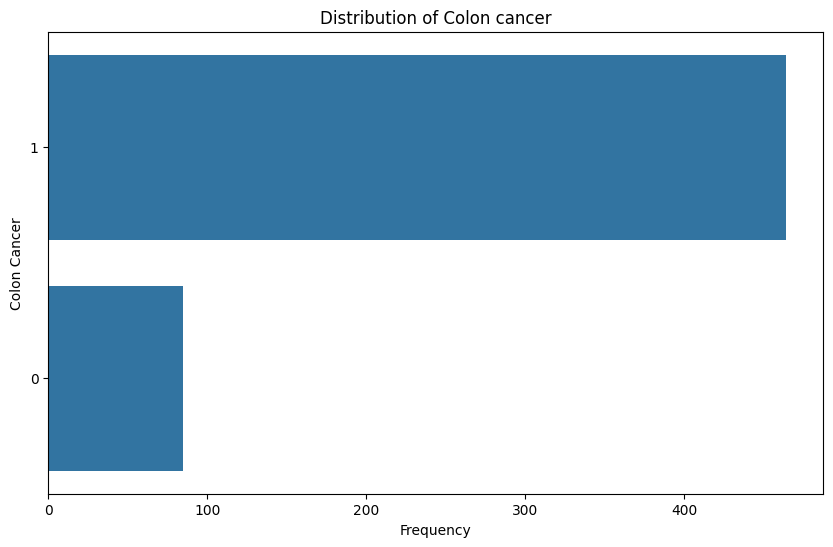

In [9]:

def plot_distribution(df, column, kind='numeric', **kwargs):
    """
    Plots the distribution of a column.
    
    Args:
    - df (DataFrame): The dataframe containing the data.
    - column (str): The column to plot.
    - kind (str): The type of plot ('numeric' or 'categorical').
    - **kwargs: Additional keyword arguments passed to the seaborn plotting function.
    """
    plt.figure(figsize=(10, 6))
    
    if kind == 'numeric':
        sns.histplot(df[column], kde=True, bins=30, **kwargs)
        plt.ylabel('Frequency')
    elif kind == 'categorical':
        sns.countplot(y=column, data=df, order=df[column].value_counts().index, **kwargs)
        plt.xlabel('Frequency')
        
    plt.title(f'Distribution of {column.capitalize()}')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_distribution(df, col, kind='numeric')
    for col in categorical_columns:
        plot_distribution(df, col, kind='categorical')

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

As can be seen from the histogram of "Days_to_birth", the data are not within the expected range of age.
This is also indicated by the variable name.

In [10]:
# Convert "day_to_birth" to age in years
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Colon Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3L-AA1B-01,61,1.513008,-0.002026,-0.531035,-0.071072,-0.865078,-0.81821,0.024706,0.799054,0.145701,...,-0.034117,0.002867,1.00211,-0.349177,-0.617186,-0.564127,1.189605,1.265867,0.333188,1
TCGA-4N-A93T-01,67,1.053208,-0.431026,-0.531035,-0.051372,-1.865578,0.03249,-0.819094,-2.489046,1.860601,...,3.199883,-1.707933,-1.28139,-0.260777,-2.458586,-1.853027,1.927305,-2.865233,-0.047712,1
TCGA-4T-AA8H-01,42,1.385708,-2.265826,-0.531035,0.130428,-1.120078,-0.64131,-0.618994,-2.043646,1.251701,...,1.335083,-2.255633,-1.28139,-0.466377,-2.600886,-2.654627,0.931005,-2.132533,0.201188,1
TCGA-5M-AAT4-01,74,0.708208,-3.403426,-0.014735,-0.346472,-1.825478,-0.53051,-0.769494,-1.134146,1.232601,...,-1.070817,-1.418933,0.16281,-0.267377,-1.509886,-0.550327,0.646005,-1.272133,-0.140812,1
TCGA-5M-AAT5-01,0,0.662908,-3.108026,-0.531035,-0.254772,-1.152978,-0.46081,-1.082994,-1.468646,0.156401,...,-1.587117,-1.680633,-0.28919,-0.509977,-1.755586,-1.232127,0.625105,-2.016233,0.405588,1


### 3. Do regression & Cross Validation

In [12]:
# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

def shuffle_data(X, y):
    """Shuffle data and return shuffled datasets."""
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], y[indices], indices

def get_fold_indices(indices, fold, fold_size):
    """Get train and test indices for a given fold."""
    test_indices = indices[fold*fold_size : (fold+1)*fold_size]
    train_indices = np.setdiff1d(indices, test_indices)
    return train_indices, test_indices

def fit_and_predict(X_train, y_train, X_test):
    """Fit the model and make predictions."""
    var_select = VariableSelection()
    var_select.fit(X_train, y_train)
    return var_select.predict(X_test)

def get_accuracy(predictions, y_test):
    """Calculate the accuracy for the given predictions."""
    binary_predictions = (predictions > 0.5).astype(int)
    return np.mean(binary_predictions == y_test)

def cross_validation(X, y, k=5):
    """Implement k-fold cross-validation."""
    X_shuffled, y_shuffled, indices = shuffle_data(X, y)
    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        train_indices, test_indices = get_fold_indices(indices, i, fold_size)
        
        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]
        
        predictions = fit_and_predict(X_train, y_train, X_test)
        accuracy = get_accuracy(predictions, y_test)
        
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

/var/folders/51/nw17mmq54k17kgt4vfq85xn40000gn/T/ipykernel_1774/1853885604.py:9: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.7380018516959852


In [13]:

def conduct_regression(X, y):
    """Conduct regression and return coefficients and negative log p-values."""
    var_select = VariableSelection()
    var_select.fit(X, y)
    coefficients = var_select.getBeta().reshape(-1).tolist()
    nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()
    return coefficients, nlog_p_values

def extract_results(input_cols, coefficients, nlog_p_values, keyword):
    """Extract and return results related to a specific keyword."""
    return [(var, coef, np.exp(-nlogp)) 
            for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values) 
            if keyword in var.lower()]

def format_results(results, keyword):
    """Format results for a given keyword."""
    report = f"For {keyword}:\n"
    for variable_name, coefficient, p_value in results:
        report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"
    return report

# Conduct regression
coefficients, nlog_p_values = conduct_regression(X, y)

# Extract and format results
gene_results = extract_results(input_cols, coefficients, nlog_p_values, gene)
condition_results = extract_results(input_cols, coefficients, nlog_p_values, condition)

# Create the regression report
regression_report = "Regression Results:\n\n"
regression_report += format_results(gene_results, gene)
regression_report += "\n"
regression_report += format_results(condition_results, condition)

print(regression_report)

Regression Results:

For apc:
APC: Coefficient = -0.0015729608746089254, p-value = 0.9867651550202134
SNAPC3: Coefficient = 0.0027570786398721223, p-value = 0.9758032892284906
APCS: Coefficient = 0.0017887273532126652, p-value = 0.982600284300564
APC2: Coefficient = -0.0017273262691606629, p-value = 0.9864456069251344
ANAPC1: Coefficient = 0.002739229655698985, p-value = 0.987441064485707
ANAPC2: Coefficient = -0.002604139753318945, p-value = 0.982517328959066
ANAPC5: Coefficient = 0.0010476780519462561, p-value = 0.991780897295071
ANAPC4: Coefficient = -0.0012621338494993605, p-value = 0.9893749628986653
ANAPC7: Coefficient = 0.007572769607204143, p-value = 0.9564509494064282
APCDD1L: Coefficient = -0.01249959848655393, p-value = 0.9120262933419172
ANAPC16: Coefficient = 0.000241322588119792, p-value = 0.9980609136681341
ANAPC11: Coefficient = -0.00028451508315201473, p-value = 0.9982950388545089
ANAPC10: Coefficient = 0.0015593782651647427, p-value = 0.9873046638945323
ANAPC13: Coeff

### 4. Discussion

In [14]:
# Generate hypothesis text

hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between APC gene and Colon Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the APC gene and Colon Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the APC gene and Colon Cancer when considering the influence of age.




In [15]:
threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    """Interpret the coefficient and p-value of a variable."""
    coef_message = {
        coefficient > 0: "positive",
        coefficient < 0: "negative"
    }.get(True, "zero")
    
    significance_message = "statistically significant" if p_value < significance_level else "not statistically significant"

    interpretation = (
        f"Variable: {variable_name}\n"
        f"Coefficient is {coef_message}, "
        f"and it is {significance_message} (p-value {'<' if p_value < significance_level else '>='} {significance_level}).\n\n"
    )

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretations = [
    interpret_coefficient(variable_name, coefficient, p_value, threshold)
    for variable_name, coefficient, p_value in gene_results + condition_results
]

interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n" + ''.join(interpretations)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: APC
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: SNAPC3
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: APCS
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: APC2
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: ANAPC1
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: ANAPC2
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: ANAPC5
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: ANAPC4
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: ANAPC7
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: APCDD1L
Coefficient is negative, an

In [16]:
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    """Determine if H0 or H1 is confirmed based on coefficient and p-value."""
    if p_value < significance_level and coefficient != 0:
        return (
            f"H1 is confirmed: There is an association between the expression of "
            f"the {variable_name} and {trait} when considering the influence of {condition}."
        )
    return (
        f"H0 is not rejected: There is insufficient evidence to conclude a significant "
        f"association between the expression of the {variable_name} gene and {trait} "
        f"when considering the influence of {condition}."
    )

# Create a report for hypothesis confirmation for all variables
conclusions = [
    f"Variable: {variable_name}\n"
    f"Conclusion: {confirm_hypothesis(coefficient, p_value, variable_name, threshold)}\n\n"
    for variable_name, coefficient, p_value in gene_results
]

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n" + ''.join(conclusions)

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: APC
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the APC gene and Colon Cancer when considering the influence of age.

Variable: SNAPC3
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the SNAPC3 gene and Colon Cancer when considering the influence of age.

Variable: APCS
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the APCS gene and Colon Cancer when considering the influence of age.

Variable: APC2
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the APC2 gene and Colon Cancer when considering the influence of age.

Variable: ANAPC1
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant